# Results for the report

In [28]:
import errors
import wolff
import metropolis
import evolution
import numpy as np
import matplotlib.pyplot as plt
import observables
from scipy.optimize.minpack import curve_fit
import sys
sys.setrecursionlimit(10000000)

### Example of how to run a simulation

In [20]:
# Define simulation parameters
size = 50
T_i = 1
T_f = 1.5
step = 0.01

In [21]:
# Execute Wolff algorithm
frames_w, obs_w = evolution.evolution(f=wolff.wolff_evolution,
                                                      relax=10,
                                                      L=size,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)

In [22]:
# Execute Metropolis algorithm
frames_m, obs_m = evolution.evolution(f=metropolis.metropolis_evolution,
                                                      relax=6000,
                                                      L=size,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)

In [23]:
# Save Wolff observables
temps_m_w, m_w, error_m_w, tau_m_w = obs_w[0]
temps_cv_w, cv_w, error_cv_w, tau_cv_w = obs_w[1]
temps_s_w, s_w, error_s_w, tau_s_w = obs_w[2]

In [24]:
# Save Metropolis observables
temps_m_m, m_m, error_m_m, tau_m_m = obs_m[0]
temps_cv_m, cv_m, error_cv_m, tau_cv_m = obs_m[1]
temps_m_s, s_m, error_s_m, tau_s_m = obs_m[2]

Text(0.5, 1.0, 'Magnetization: J=1, H=0')

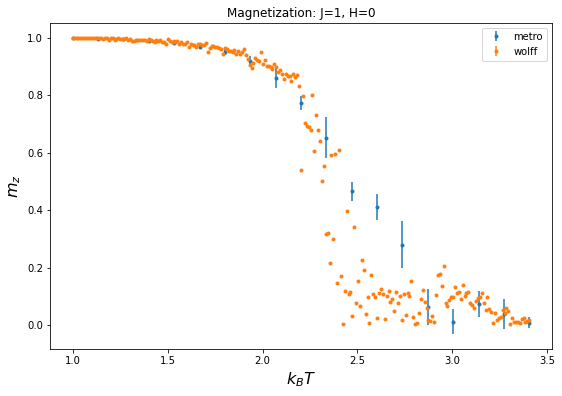

In [25]:
# Plot magnetization
plt.figure(figsize=(9,6))
plt.errorbar(temps_m_m,abs(m_m),yerr=error_m_m,fmt='o',markersize=3,label='metro')
plt.errorbar(temps_m_w,abs(m_w),yerr=error_m_w,fmt='o',markersize=3,label='wolff')
plt.legend()
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('Magnetization: J=1, H=0')

## Metropolis algorithm
# Magnetization
We will study the following parameters:
* Lattice size
* Number of relaxation steps
* Phase diagram w.r.t. $k_BT$ and $h$

In [33]:
# Define variables to evaluate and store

T_i = 0.75
T_f = 1.5
step = 0.01
T_c = 2.27

lengths = [10, 20, 40, 80, 100]
magnets_m = []
suscepts_m = []
cvs_m = []

# Run simulation for different system sizes
for length in lengths:
    _, obs_m = evolution.evolution(f=metropolis.metropolis_evolution,
                                                      relax=6000,
                                                      L=length,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)
    # Save data
    magnets_m.append(obs_m[0])
    cvs_m.append(obs_m[1])
    suscepts_m.append(obs_m[2])

/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:37: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)


In [50]:
(T_f*T_c-T_i)/step

265.5

/home/student/Project-2---Ising_juandaanieel_kwo/scripts/observables.py:6: RuntimeWarning: invalid value encountered in power
  anal_M = np.nan_to_num(pow(1-pow(np.sinh(2*(1/(Temperature))*J),-4),1/8))


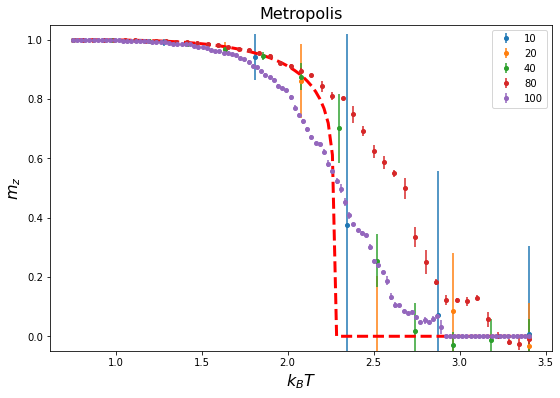

In [49]:
plt.figure(figsize=(9,6))
for mag in magnets_m:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(lengths)
plt.plot(magnets_m[-1][0],observables.analytic_mag(magnets_m[-1][0]),color='r',ls='--',lw=3)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('Metropolis',fontsize=16)
plt.ylim(-0.05,1.05)
plt.savefig(f"../simulation_images/metropolis_size_dependence.pdf",  bbox_inches='tight')

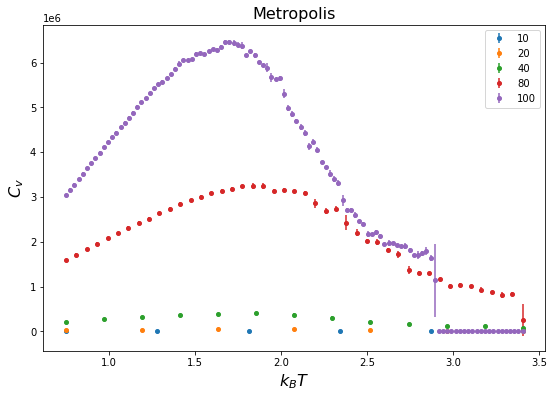

In [75]:
plt.figure(figsize=(9,6))
for mag in cvs_m:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(lengths)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$C_v$',fontsize=16)
plt.title('Metropolis',fontsize=16)
plt.savefig(f"../simulation_images/met_cv.pdf",  bbox_inches='tight')

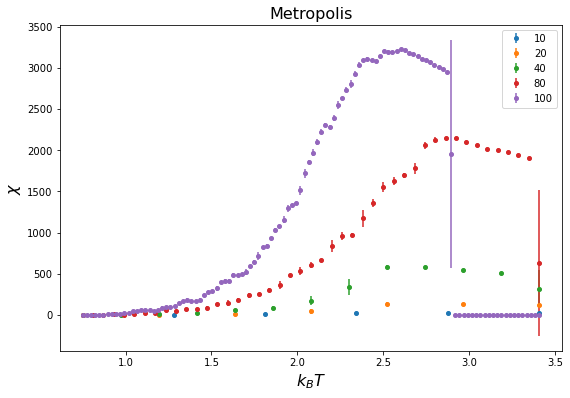

In [74]:
plt.figure(figsize=(9,6))
for mag in suscepts_m:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(lengths)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$\chi$',fontsize=16)
plt.title('Metropolis',fontsize=16)
plt.savefig(f"../simulation_images/met_susc.pdf",  bbox_inches='tight')

<ipython-input-24-d6ece530d990>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  taus.append(np.array(mag)[3])
<ipython-input-24-d6ece530d990>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  error_taus.append(np.array(mag)[4])


<ErrorbarContainer object of 3 artists>

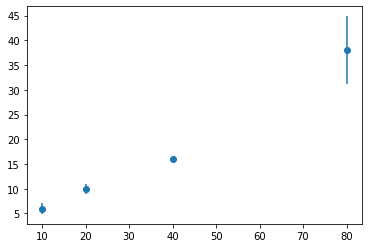

In [24]:
taus = []
error_taus = []
for mag in magnets:
    taus.append(np.array(mag)[3])
    error_taus.append(np.array(mag)[4])
taus
plt.errorbar(lengths[:-2],taus[:-2],yerr=np.concatenate(error_taus[:-2]),fmt='o')

### Fitting of observables around the critical temperature

In [5]:
T_i = 0.75
T_f = 1.5
step = 0.01
T_c = 2.27


_, obs = evolution.evolution(f=metropolis.metropolis_evolution,
                                                      relax=6000,
                                                      L=50,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)


/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:37: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)


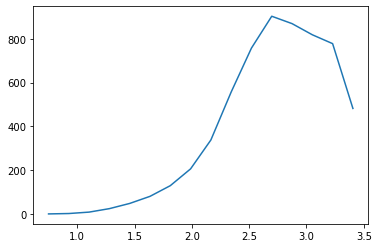

In [6]:
plt.plot(obs[2][0],obs[2][1])

In [11]:
def func_critical_sus(x,l):
    return abs(x)**(-l)

In [12]:
susceptibility = obs[2]
red_t = (susceptibility[0]-2.27)/2.27

In [13]:
curve_fit(func_critical_sus, red_t, susceptibility[1])

(array([1.88060788]), array([[0.03962635]]))

In [17]:
7/4

1.75

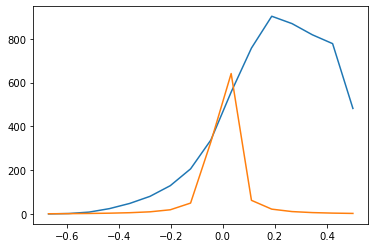

In [15]:
plt.plot(red_t,susceptibility[1])
plt.plot(red_t, func_critical_sus(red_t,1.88060788))

# Wolff Algorithm

In [26]:
# Define variables to evaluate and store

T_i = 0.75
T_f = 1.5
step = 0.01

lengths = [10, 20, 40, 80, 100]
magnets_w = []
suscepts_w = []
cvs_w = []

# Run simulation for different system sizes
for length in lengths:
    _, obs_w = evolution.evolution(f=wolff.wolff_evolution,
                                                      relax=10,
                                                      L=length,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)
    # Save data
    magnets_w.append(obs_w[0])
    cvs_w.append(obs_w[1])
    suscepts_w.append(obs_w[2])

/home/student/Project-2---Ising_juandaanieel_kwo/scripts/observables.py:6: RuntimeWarning: invalid value encountered in power
  anal_M = np.nan_to_num(pow(1-pow(np.sinh(2*(1/(Temperature))*J),-4),1/8))


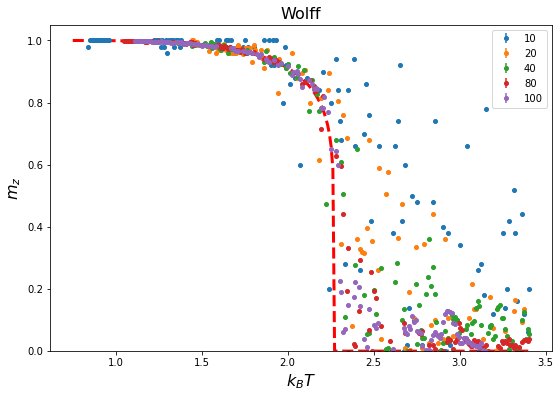

In [48]:
plt.figure(figsize=(9,6))
for mag in magnets_w:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(lengths)
plt.plot(magnets_w[-1][0],observables.analytic_mag(magnets_w[-1][0]),color='r',ls='--',lw=3)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('Wolff',fontsize=16)
plt.ylim(0,1.05)
plt.savefig(f"../simulation_images/wolff_size_dependence.pdf",  bbox_inches='tight')

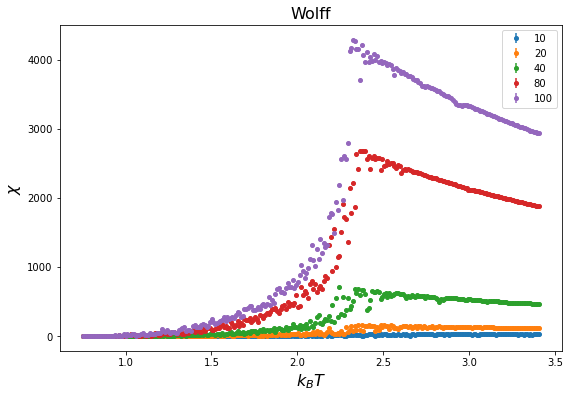

In [72]:
plt.figure(figsize=(9,6))
for mag in suscepts_w:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(lengths)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$\chi$',fontsize=16)
plt.title('Wolff',fontsize=16)
plt.savefig(f"../simulation_images/wolff_susc.pdf",  bbox_inches='tight')

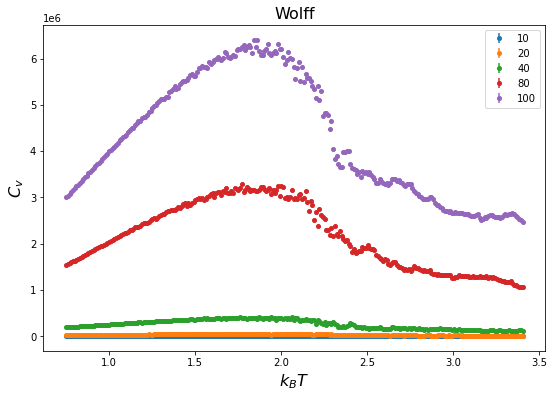

In [73]:
plt.figure(figsize=(9,6))
for mag in cvs_w:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(lengths)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$C_v$',fontsize=16)
plt.title('Wolff',fontsize=16)
plt.savefig(f"../simulation_images/wolff_cv.pdf",  bbox_inches='tight')

## Relaxation steps dependence

### Metropolis

In [67]:
# Define variables to evaluate and store

T_i = 0.75
T_f = 1.5
step = 0.005
size = 50

relax = np.arange(1000,10000,step=2000)
magnets_m_relax = []
suscepts_m_relax = []
cvs_m_relax = []

# Run simulation for different system sizes
for length in relax:
    _, obs_relax_m = evolution.evolution(f=metropolis.metropolis_evolution,
                                                      relax=length,
                                                      L=size,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)
    # Save data
    magnets_m_relax.append(obs_relax_m[0])
    cvs_m_relax.append(obs_relax_m[1])
    suscepts_m_relax.append(obs_relax_m[2])

/home/student/Project-2---Ising_juandaanieel_kwo/scripts/errors.py:37: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)


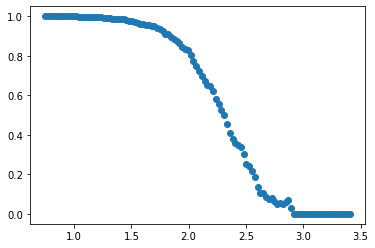

In [66]:
i=1
plt.plot(magnets_m_relax[i][0],magnets_m_relax[i][1],'o')

/home/student/Project-2---Ising_juandaanieel_kwo/scripts/observables.py:6: RuntimeWarning: invalid value encountered in power
  anal_M = np.nan_to_num(pow(1-pow(np.sinh(2*(1/(Temperature))*J),-4),1/8))


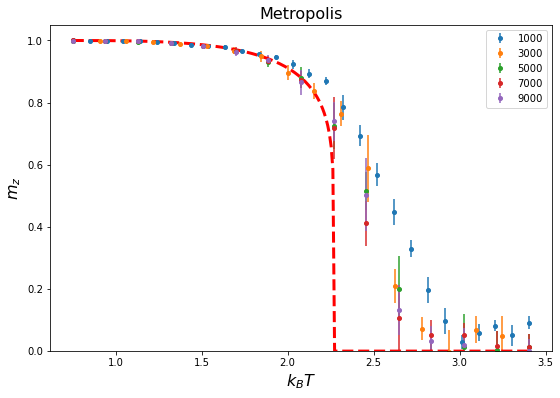

In [70]:
plt.figure(figsize=(9,6))
for mag in magnets_m_relax:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.legend(relax)
plt.plot(magnets_w[-1][0],observables.analytic_mag(magnets_w[-1][0]),color='r',ls='--',lw=3)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('Metropolis',fontsize=16)
plt.ylim(0,1.05)
plt.savefig(f"../simulation_images/metropolis_relax_dependence.pdf",  bbox_inches='tight')

### Wolff

In [ ]:
# Define variables to evaluate and store

T_i = 0.75
T_f = 1.5
step = 0.01
size = 25

relax_w= np.arange(1,10,step=2)
magnets_w_relax = []
suscepts_w_relax = []
cvs_w_relax = []

# Run simulation for different system sizes
for length in relax:
    print(length)
    _, obs_relax_w = evolution.evolution(f=wolff.wolff_evolution,
                                                      relax=length,
                                                      L=size,
                                                      T_init=T_i,
                                                      T_max=T_f,
                                                      dT=step)
    # Save data
    magnets_w_relax.append(obs_relax_w[0])
    cvs_w_relax.append(obs_relax_w[1])
    suscepts_w_relax.append(obs_relax_w[2])

1000


In [ ]:
plt.figure(figsize=(9,6))
for mag in magnets_m_relax:
    plt.errorbar(mag[0], mag[1], yerr=mag[2], fmt='o', markersize=4)
plt.lenged(relax_w)
plt.plot(magnets_w[-1][0],observables.analytic_mag(magnets_w[-1][0]),color='r',ls='--',lw=3)
plt.xlabel(r'$k_B T$',fontsize=16)
plt.ylabel(r'$m_z$',fontsize=16)
plt.title('Wolff',fontsize=16)
plt.ylim(0,1.05)
plt.savefig(f"../simulation_images/wolff_relax_dependence.pdf",  bbox_inches='tight')